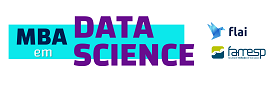

# **Acesso a Banda Larga Fixa no Brasil 2019 - 2021**

## **Entendendo o contexto**

### **Banda Larga Fixa**

Atualmente vivemos num mundo altamente conectado e, para que haja conexões entre dispositivos, seja Smartphones, Tablets, Computadores, TV e até outros eltrodomésticos precisamos acessar a rede mundial de computadores, a internet. Atualmente fazemos conexões atrabés de banda larga fixa e móveis (3G, 4G,5G,etc).

Aqui discutiremos as conexões via banda larga fixa que ocorre através de tecnologias como ADSL, xDSL, Fibra Ótica, dentre outras.

No Brasil a Agência Nacional de Telecomunicações (Anatel), autarquia do Governo Federal no  Brasil é o orgão de regulação do setor de Telecomunicações no Brasil.

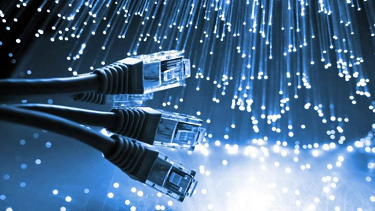

### **O Objetivo da Aula**

Compreender o mercado de banda larga fixa no Brasil através de visualização de dados.

### **O dataset**

Estes conjuntos de dados, oriundos da Anatel (Agência Nacional de Telecomunicações), foram estruturados de forma que cada instância é um tipo de contratação, com determinada teconologia, em determinado município, para determinada Empresa, e os atributos são:

- **ano:** Ano;
- **mes:** Mês;
- **sigla_uf:** Sigla da Unidade da Federação; 
- **id_municipio:** Código do Município;
- **cnpj:** Cadastro Nacional de Pessoa Jurídica;
- **empresa:** Nome da empresa;
- **porte_empresa:** Porte da empresa;
- **tecnologia:** Tecnologia;
- **transmissao:** Meios de transmissão;
- **velocidade:** Velocidade contratada
- **acessos:** Número total de contratos

Os conjunto de dados está disponível em um repositório no GitHub que pode ser acessado através do link:

- https://github.com/jonates/opendata/raw/master/banda_larga/banda_larga.parquet;


### **A Biblioteca Seaborn**

matplotlib é uma biblioteca python, baseada na Matplotlib, para visualização de dados. 

Para maiores informações da Altair, consulte a documentação no endereço a seguir:

- https://seaborn.pydata.org/

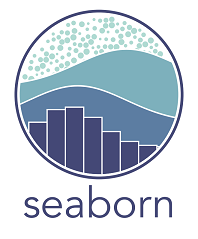

## **Hands-on**

1. **Carregar dados**;
2. **Entender a estrutura dos dados**;
3. **Transformar dados**;
4. **Elaboração do Gráfico**.

### **Carregando o conjunto de dados**

In [28]:
# Fazendo download do conjunto de dados do acesso a banda larga
!wget --verbose --show-progress --no-check-certificate https://github.com/jonates/opendata/raw/master/banda_larga/banda_larga.parquet

--2022-05-12 16:43:46--  https://github.com/jonates/opendata/raw/master/banda_larga/banda_larga.parquet
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jonates/opendata/master/banda_larga/banda_larga.parquet [following]
--2022-05-12 16:43:46--  https://raw.githubusercontent.com/jonates/opendata/master/banda_larga/banda_larga.parquet
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65421922 (62M) [application/octet-stream]
Saving to: ‘banda_larga.parquet.1’

banda_larga.parquet 100%[===================>]  62.39M   286MB/s    in 0.2s    

2022-05-12 16:43:47 (286 MB/s) - ‘banda_larga.parquet.1’ sav

In [29]:
# Importando o Pandas
import pandas as pd

In [30]:
# Importando o conjunto de dados do acesso de banda larga
bl = pd.read_parquet(
    path = '/content/banda_larga.parquet'
)

In [31]:
# Espiando o conjunto de dados
bl.head(5)

,ano,mes,sigla_uf,id_municipio,cnpj,empresa,porte_empresa,tecnologia,transmissao,velocidade,acessos
0,2007,3,AC,1200013,33530486000129,CLARO,Grande Porte,xDSL,Cabo MetÃ¡lico,0Kbps a 64Kbps,1
1,2007,3,AC,1200013,76535764000143,OI,Grande Porte,Outra,Outra,0Kbps a 64Kbps,2
2,2007,3,AC,1200013,76535764000143,OI,Grande Porte,Outra,Outra,512kbps a 2Mbps,2
3,2007,3,AC,1200013,76535764000143,OI,Grande Porte,Outra,Outra,64Kbps a 512Kbps,4
4,2007,3,AC,1200013,76535764000143,OI,Grande Porte,xDSL,Cabo MetÃ¡lico,2Mbps a 34Mbps,2


### **Espiando a estrutura dos dados**

In [32]:
# Informacoes gerais do conjunto de dados de consumo de banda larga
bl.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16537489 entries, 0 to 16537488
Data columns (total 11 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   ano            int32 
 1   mes            int32 
 2   sigla_uf       object
 3   id_municipio   int32 
 4   cnpj           int64 
 5   empresa        object
 6   porte_empresa  object
 7   tecnologia     object
 8   transmissao    object
 9   velocidade     object
 10  acessos        int32 
dtypes: int32(4), int64(1), object(6)
memory usage: 1.1+ GB


### **Transformando o conjunto de dados**

In [33]:
# Filtrando somente o período 2019-2021
bl = bl.query('((ano==2019) | (ano==2021)) & (mes==12)')


In [34]:
# Verificando se o filtro de ano funcionou
bl.ano.value_counts()

2021    195425
2019    153091
Name: ano, dtype: int64

In [35]:
# Verificando se o filtro de mes funcionou
bl.mes.value_counts()

12    348516
Name: mes, dtype: int64

In [36]:
# Tabela com acessos por empresas
bl_empresas = bl[['empresa','acessos']]\
  .groupby('empresa', as_index = True)\
  .sum()\
  .reset_index()\
  .sort_values('acessos', ascending=False)

# Calculando porcentagem
bl_empresas['pct'] = (bl_empresas['acessos'] / bl_empresas['acessos'] .sum()) \
                    .mul(100).round(2)

# Espiando a tabela
bl_empresas.head(10)      

,empresa,acessos,pct
1409,CLARO,19310685,25.95
8828,VIVO,13345942,17.94
6312,OI,10458186,14.05
397,ALGAR (CTBC TELECOM),1397567,1.88
8260,TIM,1275188,1.71
1117,Brisanet Servicos de Telecomunicacoes S.A.,1194688,1.61
2002,DESKTOP - SIGMANET COMUNICAÃ‡ÃƒO MULTIMÃDIA L...,747445,1.00
7946,SUMICITY TELECOMUNICACOES S.A.,632363,0.85
8494,UNIFIQUE TELECOMUNICACOES S/A,606014,0.81
8680,VERO,566145,0.76


In [37]:
# Definindo função para categorizar empresas
def categoriza_empresa(x):
    if x == 'CLARO':
        return 'CLARO'
    elif x == 'VIVO':
        return 'VIVO'
    elif x == 'OI':
        return 'OI'
    else:
        return 'OUTRAS'

# Categorizando
bl['empresa_cat'] = bl['empresa'].apply(categoriza_empresa);     

In [38]:
# Verificando se a categorização funcionou
bl['empresa_cat'].unique()

array(['OUTRAS', 'OI', 'CLARO', 'VIVO'], dtype=object)

### **Análise do acesso a Banda Larga Fixa no Brasil 2019 - 2021**

In [39]:
# Importando as bibliotecas necessarias
import seaborn as sns
import matplotlib.pyplot as plt

#### **Empresas de Banda Larga no Brasil em Dezembro 2021**

In [40]:
# Filtrando somente as instâncias no ano de 2021
bl_21 = bl.query('ano == 2021')

In [41]:
# Tabela com acessos por empresas em dezembro de 2021
bl_21_empresas = bl_21[['empresa_cat','acessos']]\
  .groupby('empresa_cat', as_index = True)\
  .sum()\
  .reindex(['CLARO', 'VIVO', 'OI', 'OUTRAS']) \
  .reset_index()

# Calculando porcentagem
bl_21_empresas['pct'] = (bl_21_empresas['acessos'])\
                        .div(bl_21_empresas['acessos'] .sum()) \
                        .mul(100)\
                        .round(2)

# Espiando a tabela
bl_21_empresas.head()  

,empresa_cat,acessos,pct
0,CLARO,9732056,23.45
1,VIVO,6321935,15.23
2,OI,5202420,12.53
3,OUTRAS,20248272,48.79


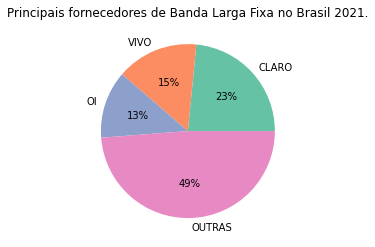

In [42]:
# Elaborando gráfico de pizza com paleta de cores do seaborn
plt.pie(
    x = bl_21_empresas.acessos, 
    labels = bl_21_empresas.empresa_cat, 
    colors = sns.color_palette('Set2'),
    autopct='%.0f%%',
)

# Inserindo título
plt.title('Principais fornecedores de Banda Larga Fixa no Brasil 2021.');

# Exibindo o gráfico
plt.show()

#### **Acessos a Banda Larga fixa no Brasil 2019 - 2021**

In [43]:
# Tabela com acessos por ano
bl_ano = bl[['ano','acessos']]\
  .groupby('ano', as_index = True)\
  .sum()\
  .div(1000000)\
  .round(1)\
  .reset_index()

# Espiando a tabela
bl_ano.head()    

,ano,acessos
0,2019,32.9
1,2021,41.5


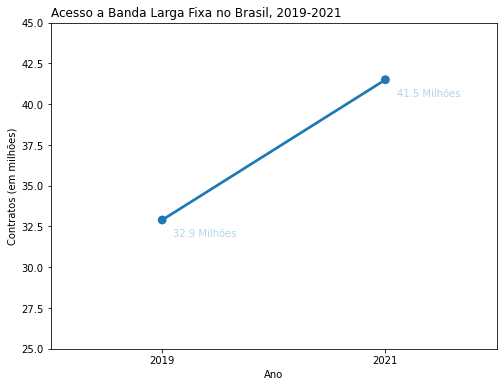

In [45]:
# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize =(8, 6))

# Criando o grafico
ax = sns.pointplot(data=bl_ano, x="ano", y="acessos", colors = 'darkblue');

# Alterando os eixos

# Inserindo o título
ax.set_title('Acesso a Banda Larga Fixa no Brasil, 2019-2021', loc ='left')

# Delimitando a escala do eixo y
plt.ylim([25, 45])

# Inserindo rótulos dos eixos
plt.xlabel("Ano")
plt.ylabel("Contratos (em milhões)")

# Adicionando rótulo de valores
for p in zip(ax.get_xticks(), bl_ano.acessos):
  ax.text(x = p[0]+0.05, y = p[1]-1, s = str(p[1])+' Milhões', color='lightblue')

# Exibindo o gráfico
plt.show()

#### **Velocidade da Banda Larga fixa no Brasil em 2021**

In [46]:
# Tabela com acessos por empresas em dezembro de 2021
bl_21_velocidade = bl_21[['velocidade','acessos']]\
  .groupby('velocidade', as_index = True)\
  .sum()\
  .reindex([
      '0Kbps a 512Kbps', 
      '512kbps a 2Mbps', 
      '2Mbps a 12Mbps', 
      '12Mbps a 34Mbps', 
      '> 34Mbps',]
   ) \
  .reset_index()



In [47]:
# Calculando porcentagem
bl_21_velocidade['pct'] = (bl_21_velocidade['acessos'])\
                          .div(bl_21_velocidade['acessos'].sum()) \
                          .mul(100)\
                          .round(1)

# Espiando a tabela
bl_21_velocidade.head()  

,velocidade,acessos,pct
0,0Kbps a 512Kbps,124096,0.3
1,512kbps a 2Mbps,1344698,3.2
2,2Mbps a 12Mbps,3464661,8.3
3,12Mbps a 34Mbps,3625883,8.7
4,> 34Mbps,32945345,79.4


Text(0, 0.5, 'Acessos (em %)')

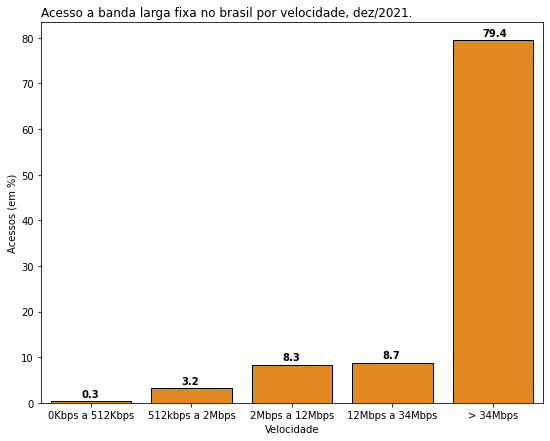

In [48]:
# Elaborando um gráfico de Barras

# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize =(9, 7))

# Fazendo o gráfico de Colunas
ax = sns.barplot(
    data = bl_21_velocidade,
    x = 'velocidade' , 
    y= 'pct',
    color = 'darkorange',
    edgecolor="black"
);

# Inserindo o título
ax.set_title(
    label = 'Acesso a banda larga fixa no brasil por velocidade, dez/2021.', 
    loc ='left'
)

# Adicionando rótulo de valores
for i in ax.patches:
    plt.text(
        x = i.get_x()+0.3, 
        y = i.get_height()+1,
        s = str(round((i.get_height()), 2)),
       fontsize = 10, 
       fontweight ='bold',
       color ='black'
    );

# Inserindo rótulos dos eixos
plt.xlabel("Velocidade")
plt.ylabel("Acessos (em %)")

#### **Acesso a Banda Larga fixa no Brasil por empresa e UF em 2021**

In [49]:
# Tabela com acessos por empresas em dezembro de 2021
bl_21_empresa_uf = bl_21[['sigla_uf', 'empresa_cat', 'acessos']]\
  .groupby(['sigla_uf', 'empresa_cat'])\
  .sum()

# Tabela com acesso por UF
bl_21_uf = bl_21[['sigla_uf', 'acessos']]\
  .groupby(['sigla_uf'])\
  .sum()

# Calculando a porcentagem
bl_21_empresa_uf_pct = bl_21_empresa_uf \
                        .div(bl_21_uf, level='sigla_uf')\
                        .mul(100)\
                        .reset_index()

# Espiando a tabela
bl_21_empresa_uf_pct.head(12)  

,sigla_uf,empresa_cat,acessos
0,AC,CLARO,16.506931
1,AC,OI,53.677228
2,AC,OUTRAS,29.809901
3,AC,VIVO,0.005941
4,AL,CLARO,27.039492
5,AL,OI,8.830051
6,AL,OUTRAS,56.426850
7,AL,VIVO,7.703607
8,AM,CLARO,45.790200
9,AM,OI,17.960901


Text(0, 0.5, 'Unidade da Federação')

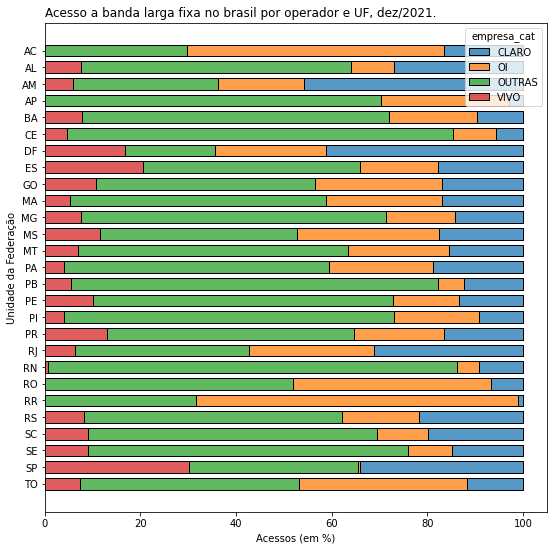

In [50]:
# Elaborand um gráfico de Barras acumuladas

# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize =(9, 9))

# Fazendo o gráfico de barras acumuladas
ax = sns.histplot(
    data = bl_21_empresa_uf_pct,
    y = 'sigla_uf' , 
    weights= 'acessos',
    hue = 'empresa_cat',
    multiple = 'stack',
    shrink = 0.7)

# Inserindo o título
ax.set_title(
    label = 'Acesso a banda larga fixa no brasil por operador e UF, dez/2021.', 
    loc ='left'
)

# Inserindo rótulos dos eixos
plt.xlabel("Acessos (em %)")
plt.ylabel("Unidade da Federação")

#### **Saiba mais**

Para mais informações sobre outros tipos de gráficos no Seaborn, bem como para customizações acesse a documentação:
-  https://seaborn.pydata.org/api.html
- https://seaborn.pydata.org/examples/index.html

### **Faça Você mesmo**

Baseado nos conhecimentos desta aula, construa gráficos com a biblioteca Seaborn, para visualizar o comportamento do consumo de energia elétrica no Brasil.

O conjunto de dados está disponível para download no link:
- https://raw.githubusercontent.com/jonates/opendata/master/consumo_energia_eletrica/consumo_energia_eletrica.csv